# Introduction to Regression Analysis
- One of the most common methods of prediction
- Used when we have a causal relationship between variables
- Very powerful when used with other methods such as factor analysis
- The fundamentals of regression analysis are used in machine learning

# Simple Linear Regression
A linear regression is a linear approximation of a causal relationship between two or more variables
- The dependent variable is labelled Y and is what is being predicted
- The independent variables are labelled $x_1, x_2, ... , x_k$ and are the predictors
- The dependent variable is a function of the independent variables
- The regression model is a linear approximation of this function

## Simple Linear Regression (Population Formula)
$$y = \beta_0 + \beta_1 x_1 + \varepsilon$$
- y is the dependent
- x is the independent
- $\beta_0$ represents a constant
- $\beta_1$ quantifies the effect of $x_1$ on $y$
- $\varepsilon$ represents the error of estimation, this is the difference between the observed income and the income the regression predicted, on average across all the data the error is 0

### Example
Let $y$ be income and $x_1$ be years of education, i.e. the more years you spend in education the more income you are likely to make.
- $\beta_0$ would represent minimum wage, as irrespective of education you will make at least minimum wage
- $\beta_1$ quantifies the effect of education on income
- $\varepsilon$ this is the error of estimation

## Simple Linear Regression (Sample Formula)
$$\hat{y} = b_0 + b_1x_1$$
- The hat symbol indicates an estimated/predicted value
- $b_0$ is an estimate for $\beta_0$
- $b_1$ is an estimate for $\beta_1$
- $x_1$ is the sample data for the independent variable

## Correlation vs Regression
**Correlation does not imply Causation**
- Correlation describes the relationship between different variables where as regression describes how one variable affects another
- Correlation describes how variables are inter-related, i.e. if one increases does the other increase or decrease respectively. Correlation describes connection, where as regression describes cause and effect
- The correlation between x and y is the same as the correlation between y and x, this is not the case for regression

# Simple Linear Regression in Python

## How to understand a regression table

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
data = pd.read_csv('1.01. Simple linear regression.csv')

In [3]:
data.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


In [4]:
y = data['GPA']
x1 = data['SAT']
x = sm.add_constant(x1)
results = sm.OLS(y, x).fit()
results.summary()
#The table below is a regression table

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Thu, 28 Jul 2022   Prob (F-statistic):           7.20e-11
Time:                        17:34:49   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.503      -0.538       1.088
SAT            0.0017      0.000      7.487      0.000       0.001       0.002
==============================================================================
Omnibus:                       12.839   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.155
Skew:                          -0.722   Prob(JB):                     0.000310
Kurtosis:                       4.590   Cond. No.                     3.29e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The table above is split into 3 sections; a model summary, a coefficients table, and a section with some extra tests.

### The coefficients table
- The constant coefficient is in the first row first column of the table. (0.275 = $b_0$)
- The coefficient of $x1$ is in the second row first column of the table. (0.0017 = $b_1$)
- These are the only two numbers we need to define the regression equation.


- The standard error shows the accuracy of prediction for each variable, the lower the standard error, the more accurate the estimation is.
- We also have the t-statistic and its p-value in the third and fourth column. 
- The null hypothesis asks if $\beta = 0$, we can check both constants by looking at the p-value in the fourth column, if it is less than 0.05 then the constant is different from 0. In the case of the coefficient of $x1$ we have a p-value of 0.000 meaning it is definitely not zero.
- The above result indicates that SAT is a significant variable when predicting college GPA.
- The p-value for the constant coefficient is 0.503, this means the constant may not be different from 0, but the regression line passing through the origin is not essential as we are interested in the causal relationship of the Xs.

## Decomposition of Variability
### Sum of Squares Total (SST)
$$\sum^n_{i=1}(y_i - \bar{y})^2$$
- This can be thought of as the dispersion of the observed variables around the mean
- This measures the total variability of the dataset
- Also known as Total Sum of Squares (TSS)

### Sum of Squares Regression (SSR)
$$\sum^n_{i=1}(\hat{y_i} - \bar{y})^2$$
- Measures how well your regression line fits the data
- In maths terms; it measures the explained variability by the regression line
- If SSR = SST, this means the regression model captures all the observed variability, and is perfect
- Also known as Explained Sum of Squares (ESS)

### Sum of Squares Error (SSE)
$$\sum^n_{i=1}e_i^2$$
- The error is the difference between the observed value and the predicted value
- This measures the unexplained variability by the regression
- We usually want to minimise the error, the smaller the error the better the estimation power of the regression
- Also known as Residual Sum of Squares (RSS)

### SST = SSR + SSE
This stems from SST representing the total variability, SSR representing the variability explained by the regression, and SSE representing the unexplained variability, known as error.

## Model Summary
- **Dep. Variable** names the dependent variable
- **Model** this tells us the model is the ordinary least squares
- **Method** this is closely related to the model, it tells us the method used is the Least Sqaures method

### What is OLS?
- Most common method to estimate the linear regression equation
- Least Squares stands for the minimum squares error (min SSE)
- Lower error implies better explanatory power of model
- The OLS finds the regression line with the least error, graphically iy is the one closest to all points

### Other methods (preferred in different contexts)
- Generalised least squares
- Maximum likelihood estimation
- Bayesian regression
- Kernel regression
- Gaussian process regression

### R-Squared
$$R^2 = \frac{SSR}{SST}$$
- This is a relative measure that takes values from 0 to 1
- $R^2 = 0$ means the regression explains NONE of the variability in the data
- $R^2 = 1$ means the regression explains the ENTIRE variability in the data
- The closer $R^2$ is to 1, the more powerful the regression is

**What is a good $R^2$?**
- No rule of thumb
- In science usually between 0.7 and 0.99
- In social sciences (e.g. finance, economics, sociology) of 0.2 could be considered good, it depends on how many variables are thought to be at play
- In our example we had $R^2 = 0.406$, since this far away from 0.9, we may conclude we are missing some important information. Factors like gender, income and marital status could help us understand the whole picture a little better.

**Critical thinking is an important part of regression analysis** so we must consider why a factor is significant before agreeing that it is.
- First women are more likely to outperform men in high school, but in higher education more men enter academia, there are many biases here. Scientific research shows that a gender gap exists in education
- If your household income is low, you are more likely to get a part-time job, thus you'll have less time to study and get lower grades
- If you get married and have a child, you are less likely to attend, this will lead to lower grades

The $R^2$ measures the **goodness of fit** of your model, i.e. how well your model fits the data, the more factors you include in your regression, the higher the $R^2$. You should only add more factors if it results in a better model

# Multiple Linear Regression

- Good models require multiple regressions, in order to address the higher complexity of problems
- The more variables you have the more factors you are considering

## Population Equation
$$\gamma = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_kx_k + \varepsilon$$

- $\gamma$ is the dependent variable
- $x_i$ are the independent variables
- $\beta_i$ are coefficients
- $\varepsilon$ is the error

## Sample Equation
$$\hat{y} = b_0 + b_1x_1 + b_2x_2 + ... + b_kx_k$$

- $\hat{y}$ is the inferred value
- $b_0$ is the intercept
- $x_i$ are the independent variables
- $b_i$ are the coefficients of the corresponding ind. variable

- This is not about the best fitting line anymore, after 3 dimension (two independent variables and one dependent) there is no visual way to represent the data. This is about finding the **best fitting model**.
- What we want is the least sum of square errors (SSE)

## Adjusted R-Squared 
Recall:
1. The R-squared measures how much of the total variability is explained by our model
2. Multiple regressions are always better than simple ones, as with each additional variable you add, the explanatory power may only increase or stay the same

The adjusted R-squared ($\bar{R}^2$) is always smaller than R-squared as it penalizes the excessive use of variables.


The adjusted R-squared is the basis for comparing models, but we can only do this when:
1. We have the same dependent variable (y)
2. We are looking at the same dataset

# F-Statistic
- Follows an F-distribution
- The F-statistic is used for testing the overall significance of the model
- The null hypothesis is that $\beta_1 = \beta_2 = ... = \beta_k = 0$
- The alternative hypothesis is that at least one $\beta_i \neq 0$
- If all the betas are 0, then none of the independent variables matter, so the model has no merit
- We can see the significance of the model by seeing if the p-value of the F-statistic is less than 0.05
- The lower the F-statistic the closer the model is to being non-significant, so this can be used to compare models

# OLS Assumptions
1. **Linearity**
2. **No endogeneity** - i.e. covariance of independent variables and the error $\sigma_{x\varepsilon} = 0 \forall x, \varepsilon$
3. **Normality and homoscedasticity** - normality means the error term is normally distributed $\varepsilon \text{ ~ } N(0, \sigma^2)$ as the expected value of the error is 0. Homoscedasticity means constant variance
4. **No autocorrelation** - the covariance of any two error terms is 0, this is usually the thing that stops you using linear regression in analysis
5. **No multicollinearity** - this happens when two or more independent variables have a high correlation between each other

### The biggest mistake you can make is to perform a regression that violates one of these assumptions!

## Assumption 1: Linearity
- The linear regression is the simplest non-trivial relationship
- Can check by graphing each independent variable against the dependent variable on a scatter plot

Fixes:
1. Run a non-linear regression
2. Exponential transformation
3. Log transformation

## Assumption 2: No Endogeneity
- There can be no link between the independent variables and the error
- If they are correlated then we have omitted variable bias

### Omitted variable bias
- This is what happens when you forget to include a relaevant variable. As each independent variable explains y, they move together and are somewhat correlated
- Similarly y is also explained by the omitted variable, so they are also correlated
- Chances are the omitted variable is somewhat correlated with at least one of the included independent variables
- Everything that is not explained with your model goes into the error, so the error becomes correlated with everything else

#### Example
Imagine you are trying to predict the price of an apartment building in London based on its size. This is a rigid model that will have high explanatory power.
$$\hat{y} = 11342786 - 132100x_1$$
From our sample it appears that the smaller the size, the more expensive the price, this is really counter-intuitive.

This is difficult to fix, in this case with one independent variable but when your model is exhaustive with 10 variables or more, you may feel disheartened.

Critical thinking time!
1. Where did we draw the sample from?
2. Can we get a better sample?
3. Why is bigger real estate cheaper?

Say we drew the sample from Central London, and the sample size is appropriately large. So what is it about smaller size that is making it so expensive? The factor that we did not consider in our model is the location! In London, most buildings are skyscrapers with some of the most valuable real estate in the world!
$$\hat{y} = 520365 + 78210x_{size} + 7126579x_{city}$$
- size has a positive sign, which intuitively makes more sense
- x_city is 1 if in city and 0 otherwise to accomodate location as a factor

## Assumption 3: Normality and homoscedasticity
- $\varepsilon \text{ ~ } N(0, \sigma^2)$

### Normality
- We assume the error term is normally distributed, normality is not necessary for regression but is needed to form inferences
- t-tests and F-tests work because we have assumed the error is normally distributed

What should we do if the error is not normally distributed?
- Use the **Central Limit Theorem**, for large samples this applies to the error as well as the data

### Zero Mean
- If the mean is not expected to be 0, then the line is not the best fitting one, however having an intercept solves that problem
- It is unusual to violate this assumption

### Homoscedasticity
- This means to have equal variance, i.e. 
$$\sigma^2_{\varepsilon_1} = \sigma^2_{\varepsilon_2} = ... = \sigma^2_{\varepsilon_k} = \sigma^2 $$

#### Heteroscedasticity
- A heteroscedastic dataset is an example of one with varying variance
- For smaller values of the independent and dependent variables we would have a better prediction than for bigger values

#### Example: Income
- If a person is poor, they spend a constant amount of money on food, clothes, etc. The wealthier an individual is the higher the variability of their expenditure
- A poor person may have to eat eggs or potatoes everyday, both cost roughly the same amount of money
- A wealthy person is more likely to eat out at restaurants, as well as cook at home, the variability of spending habits here are high

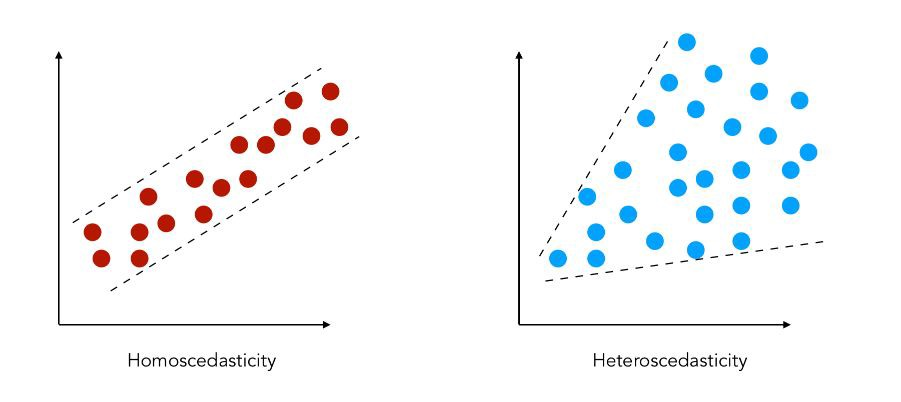

#### Prevention of Heteroscedasticity
- Look for Omitted Variable Bias
- Look for outliers and remove them
- Log Transformation

#### Log Transformation
1. Take the log of the variable
2. Perform the regression on the log(y) and x or on y and log(x), these are called **semi-log models**

You can also take the log of both variables, this is called a **log-log model**. 
$$log(\hat{y}) = b_0 + b_1(log(x_1))$$
As X increases by 1 percent, Y increases by $b_1$ percent, in economics this is called **elasticity**.

# Assumption 4: No Autocorrelation
- Also known as no serial correlation
$$\sigma_{\varepsilon_i} \sigma_{\varepsilon_j} = 0: \forall i \neq j$$
- It is highly unlikely to find this in data taken at one instant of time, e.g. cross-sectional data
- But it is very common in time series, which is used a lot in stock prices. The day-of-the-week effect, which results in low returns on Mondays and high returns on Fridays, would result in correlating errors. Errors on Mondays would be biased downwards and on Fridays biased upwards. 
- The mathematics of the linear regression does not consider this and assumes errors should be randomly spread around the regression line

### Detection
1. A common way is to plot all the residuals on a graph and look for patterns, if there are none you're safe
2. Another way is the Durbin-Watson test which is in the regression table provided by statsmodels, generally its values fall between 0 and 4, with 2 representing no auto-correlation, and values below 1 and above 3 are a cause for alarm

There is nothing you can do to remedy autocorrelation, if there is autocorrelation avoid using the linear regression model

### Alternative Models
- Autoregressive model
- Moving average model
- Autoregressive moving average model
- Autoregressive integrated moving average model

# Assumption 5: No multicollinearity
$$\rho_{x_ix_j} \approx 1: \forall i,j; \hspace{4pt} i \neq j$$
- This occurs when two or more variables have a high correlation

### Example: perfect multicollinearity
$a = 2+5b$, thus $b = \frac{a-2}{5}$, this gives $\rho_{ab} = 1$
- This is perfect multicollinearity as we can write a using b or b using a. 
- This imposes a big problem for our regression model as the coefficients will be wrongly estimated. 
- The rationale behind this is if a can be represented using b, there's no point in using both.

### Example: imperfect multicollinearity
Suppose $\rho_{cd} = 0.9$
- Here the assumption is still violated and poses a problem to our model
- The rationale is that if c can be ALMOST represented by d, there is no point in using both

### Fixes
1. Drop one of thw two variables
2. Transform them into one variable
3. Keep them both and treat them with caution (only for experienced and depends on analysis trying to be performed)

### Prevention
Find the correlation between each two pairs of independent variables